# Hossein Baghdadi
# Naive Bayes Project with scikit-learn

# Tools

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Dataset

In [2]:
data = pd.read_csv('adult.csv')
data.head(50)

,Education,Status,Others,Skin Color,Sex
0,Bachelors,Never-married,Adm-clerical,White,Male
1,Bachelors,Married-civ-spouse,Exec-managerial,White,Male
2,HS-grad,Divorced,Handlers-cleaners,White,Male
3,11th,Married-civ-spouse,Handlers-cleaners,Black,Male
4,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female
5,Masters,Married-civ-spouse,Exec-managerial,White,Female
6,9th,Married-spouse-absent,Other-service,Black,Female
7,HS-grad,Married-civ-spouse,Exec-managerial,White,Male
8,Masters,Never-married,Prof-specialty,White,Female
9,Bachelors,Married-civ-spouse,Exec-managerial,White,Male


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   32561 non-null  object
 1   Status      32561 non-null  object
 2   Others      32561 non-null  object
 3   Skin Color  32561 non-null  object
 4   Sex         32561 non-null  object
dtypes: object(5)
memory usage: 1.2+ MB


In [4]:
data.describe()

,Education,Status,Others,Skin Color,Sex
count,32561,32561,32561,32561,32561
unique,16,7,15,5,2
top,HS-grad,Married-civ-spouse,Prof-specialty,White,Male
freq,10501,14976,4140,27816,21790


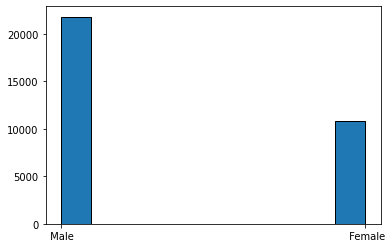

In [5]:
plt.hist(data['Sex'], edgecolor='black')
plt.plot();

# Finding NaN values in our dataset

In [6]:
df = data[data.isna().any(axis=1)]
df

,Education,Status,Others,Skin Color,Sex


So, we don't have any Nan value in our dataset .

# Missing values

In [7]:
data = data[data['Others'] != ' ?']
data.head(50)

,Education,Status,Others,Skin Color,Sex
0,Bachelors,Never-married,Adm-clerical,White,Male
1,Bachelors,Married-civ-spouse,Exec-managerial,White,Male
2,HS-grad,Divorced,Handlers-cleaners,White,Male
3,11th,Married-civ-spouse,Handlers-cleaners,Black,Male
4,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female
5,Masters,Married-civ-spouse,Exec-managerial,White,Female
6,9th,Married-spouse-absent,Other-service,Black,Female
7,HS-grad,Married-civ-spouse,Exec-managerial,White,Male
8,Masters,Never-married,Prof-specialty,White,Female
9,Bachelors,Married-civ-spouse,Exec-managerial,White,Male


# Categorize dataset

In [8]:
lenc = LabelEncoder()
oenc = OrdinalEncoder()
data[['Education', 'Status', 'Others', 'Skin Color']] = oenc.fit_transform(data[['Education', 'Status', 'Others', 'Skin Color']])
data['Sex'] = lenc.fit_transform(data['Sex'])

In [9]:
oenc.categories_

[array([' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th',
        ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate',
        ' HS-grad', ' Masters', ' Preschool', ' Prof-school',
        ' Some-college'], dtype=object),
 array([' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
        ' Married-spouse-absent', ' Never-married', ' Separated',
        ' Widowed'], dtype=object),
 array([' Adm-clerical', ' Armed-Forces', ' Craft-repair',
        ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
        ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
        ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
        ' Transport-moving'], dtype=object),
 array([' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black', ' Other',
        ' White'], dtype=object)]

# Test model

In [10]:
data.head()

,Education,Status,Others,Skin Color,Sex
0,9.0,4.0,0.0,4.0,1
1,9.0,2.0,3.0,4.0,1
2,11.0,0.0,5.0,4.0,1
3,1.0,2.0,5.0,2.0,1
4,9.0,2.0,9.0,2.0,0


In [11]:
X = data[['Education', 'Status', 'Others', 'Skin Color']]
y = data['Sex']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [12]:
model = GaussianNB()
model = model.fit(X_train, y_train)

In [13]:
ypred = model.predict(X_test)
print(ypred[0:5])
print(y_test[0:5])

[1 1 1 1 1]
3420     1
19696    0
29466    1
3684     1
25509    1
Name: Sex, dtype: int32


# Confusion Matrix

In [14]:
c = confusion_matrix(y_test, ypred)
c

array([[ 493, 1489],
       [ 366, 3796]], dtype=int64)

# Accuracy

In [15]:
print('Train set accuracy:', accuracy_score(y_train, model.predict(X_train)) * 100)
print('Test set accuracy:', accuracy_score(y_test, ypred) * 100)

Train set accuracy: 69.4717994628469
Test set accuracy: 69.80794270833334


# Classification Report

In [16]:
rp = classification_report(y_test, ypred)
print(rp)

              precision    recall  f1-score   support

           0       0.57      0.25      0.35      1982
           1       0.72      0.91      0.80      4162

    accuracy                           0.70      6144
   macro avg       0.65      0.58      0.58      6144
weighted avg       0.67      0.70      0.66      6144



# Visualization

In [17]:
X.head()

,Education,Status,Others,Skin Color
0,9.0,4.0,0.0,4.0
1,9.0,2.0,3.0,4.0
2,11.0,0.0,5.0,4.0
3,1.0,2.0,5.0,2.0
4,9.0,2.0,9.0,2.0


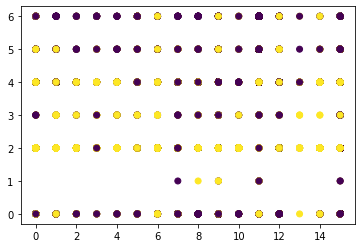

In [18]:
plt.scatter(X['Education'], X['Status'], c=y)
plt.plot();

In [19]:
X_test.head()

,Education,Status,Others,Skin Color
3420,15.0,4.0,7.0,4.0
19696,7.0,0.0,0.0,4.0
29466,11.0,2.0,4.0,4.0
3684,11.0,2.0,3.0,4.0
25509,11.0,2.0,9.0,4.0


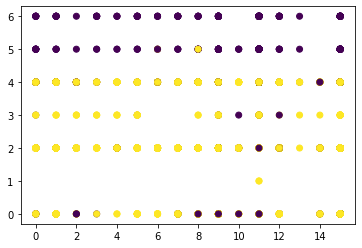

In [20]:
plt.scatter(X_test['Education'], X_test['Status'], c=ypred)
plt.plot();